In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
cemetery_df = pd.read_excel('../Data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')
cemetery_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [3]:
cemetery_df

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"


2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings. 

In [4]:
TopTenDeathsCounter = cemetery_df["Cause of Death/Burial"].value_counts()
TopTenDeathsCounter.head(10)

Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: Cause of Death/Burial, dtype: int64

In [5]:
# 2 a. Find the 10 most common (known) recorded causes of death.
UnknownDeaths = ["Unknown","Not Known"]
knownDeaths = cemetery_df[~cemetery_df["Cause of Death/Burial"].isin(UnknownDeaths)]
knownDeathsCount = knownDeaths["Cause of Death/Burial"].value_counts()
knownDeathsCount.head(10)

Consumption     1767
Still Born       841
Cholrea          667
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Cold             421
Teething         411
Name: Cause of Death/Burial, dtype: int64

In [6]:
#2 b. Clean up some of the misspellings. Use the [`replace` method]
#(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up 
#some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still
#Born" with "Stillborn".

In [7]:
cemetery_df["Cause of Death/Burial"]= cemetery_df["Cause of Death/Burial"].map(lambda x : 'Complication' if (x == 'Complicated') else x)
cemetery_df["Cause of Death/Burial"]= cemetery_df["Cause of Death/Burial"].map(lambda x : 'Measels' if (x == 'Measles') else x)
cemetery_df["Cause of Death/Burial"]= cemetery_df["Cause of Death/Burial"].map(lambda x : 'Pneumonia' if (x == 'Pneumonie') else x)
cemetery_df["Cause of Death/Burial"]= cemetery_df["Cause of Death/Burial"].map(lambda x : 'Cholera' if (x == 'Cholrea') else x)
cemetery_df["Cause of Death/Burial"]= cemetery_df["Cause of Death/Burial"].map(lambda x : 'Stillborn' if (x == 'Still Born') else x)
cemetery_df["Cause of Death/Burial"]= cemetery_df["Cause of Death/Burial"].map(lambda x : 'Fever' if (x == 'Feever') else x)

In [8]:
#2 c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  
UnknownDeaths = ["Unknown","Not Known"]
knownDeaths = cemetery_df[~cemetery_df["Cause of Death/Burial"].isin(UnknownDeaths)]
knownDeathsCount = knownDeaths["Cause of Death/Burial"].value_counts()
knownDeathsCount.head(10)

Consumption     1767
Cholera         1242
Stillborn        926
Complication     748
Old Age          604
Pneumonia        581
Flux             469
Measels          460
Cold             421
Teething         411
Name: Cause of Death/Burial, dtype: int64

In [9]:
cemetery_df

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Fever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"


3. Create a line chart showing the number of burials per year.

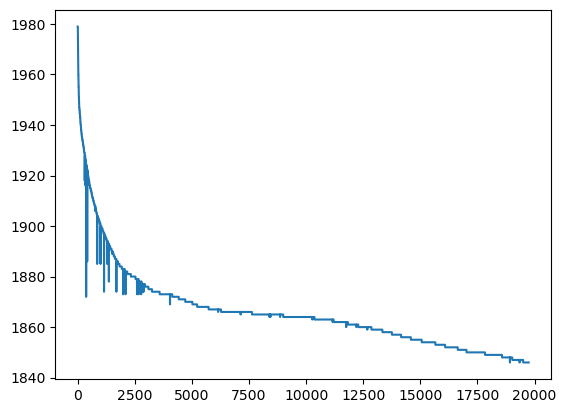

In [10]:
plt.plot(cemetery_df["Burial Year"])

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?


In [11]:
#a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) 
#to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
pd.crosstab(cemetery_df["Burial Year"],cemetery_df["Month No."])

Month No.,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Burial Year,,,,,,,,,,,,
1846.0,20,26,25,22,26,0,0,0,35,39,23,30
1847.0,43,34,38,35,26,47,40,61,35,47,36,34
1848.0,36,36,49,37,41,47,65,39,23,26,21,27
1849.0,46,64,64,43,62,231,96,36,28,18,24,33
1850.0,24,26,43,29,37,120,370,52,22,27,28,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1972.0,0,0,0,1,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,0,1,0
1977.0,0,0,1,0,1,0,0,0,0,0,1,0


In [12]:
cemetery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


In [13]:
#b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the 
#columns are sorted correctly.  
cemetery_df["Burial Year"] = cemetery_df["Burial Year"].fillna(0);
cemetery_df["Burial Year"] = cemetery_df["Burial Year"].astype(int);
cemetery_df["Month No."] = cemetery_df["Month No."].fillna(0);
cemetery_df["Month No."] = cemetery_df["Month No."].astype(int);

In [14]:
CrosstabcleanFilterMo = cemetery_df.loc[cemetery_df["Month No."]!= 0] 
Crosstabclean = CrosstabcleanFilterMo.loc[CrosstabcleanFilterMo["Burial Year"]!= 0] 
pd.crosstab(Crosstabclean["Burial Year"],Crosstabclean["Month No."])

Month No.,1,2,3,4,5,6,7,8,9,10,11,12
Burial Year,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,0,0,0,1,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,1,0
1977,0,0,1,0,1,0,0,0,0,0,1,0


In [15]:
#c. Filter your table to show only the years 1846 through 1860.
CrosstabcleanYearRange = Crosstabclean.loc[Crosstabclean["Burial Year"].between(1846,1860)]
pd.crosstab(CrosstabcleanYearRange["Burial Year"],CrosstabcleanYearRange["Month No."])

Month No.,1,2,3,4,5,6,7,8,9,10,11,12
Burial Year,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
1851,26,31,27,29,26,37,49,35,32,42,14,37
1852,37,32,39,37,58,84,76,54,31,32,36,36
1853,35,39,35,31,36,54,47,32,34,27,28,31
1854,35,33,34,43,61,137,95,44,34,25,25,30


In [16]:
#d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials.
#What are the most common causes of death for that month?
HighDeathYMCol = cemetery_df[["Cause of Death/Burial","Burial Year","Burial Month","Month No."]]
HighDeathYM = HighDeathYMCol.groupby(["Burial Year","Cause of Death/Burial","Burial Month"])["Cause of Death/Burial"].count().sort_values(ascending=False)
HighDeathYM.head(1)

Burial Year  Cause of Death/Burial  Burial Month
1866         Cholera                Sep             327
Name: Cause of Death/Burial, dtype: int64

5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

In [17]:
#a. Create a "Decade" column to show the decade in which a burial occurred.
DecadeVal = cemetery_df["Burial Year"]/10
DecadeValinT = DecadeVal.astype(int)
Decade = DecadeValinT.astype(str)+'0s'
##Decade
cemetery_df["Decade"] = Decade

In [18]:
SexDecadeFilter = cemetery_df.loc[cemetery_df["Sex"].isin(["M","F"])]
SexDecadeFilterDecade = SexDecadeFilter.loc[SexDecadeFilter["Decade"] !="00s"]
#SexDecade = SexDecadeFilterDecade.groupby(["Decade","Sex"])["Sex"].count().sort_values(ascending=False)
##pd.crosstab(SexDecadeFilterDecade["Decade"],SexDecadeFilterDecade["Sex"])
SexDecadeFilterDecade 

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade
0,6B,"Bell, Nancy Ann",Aug,8,6.0,1979,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1970s
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970s
2,6D,"Davis, Bessie",Sep,9,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970s
3,6C,"Creech, Emily Green",Aug,8,NaN,1978,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,1970s
4,6W,"Creech, Emily Green",Aug,8,NaN,1978,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1970s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19738,4-1846,Emmily,Sep,9,25.0,1846,F,B,16.0,City,Fever,Poplar,200,slave to J. Chappell,1840s
19739,4-1846,infant,Sep,9,26.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of Mr. E. Maguire Box grave,1840s
19740,4-1846,"Kingsley, A., Capt.",Sep,9,28.0,1846,M,W,67.0,City,Fever,Cedar,lot,superintendent of Nashville Cemetery,1840s
19741,4-1846,infant,Sep,9,28.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman,1840s
